### 實作**GoogleNews網路爬蟲**並分析**Jieba斷詞與DroidTown ArtiCut斷詞差異** 以及 **DroidTown ArtiCut關鍵字提取 與 詞雲(WordCloud)關鍵字提取之差異**
##### 作者: Eason Chu
*made for 國立政治大學 National ChengChi University 1111701893001_人工智慧應用專題_個人報告三* 

###### 備註：此作業為個人報告一之專案延伸


####首先，我們來實作網路爬蟲，以GoogleNews為例

1.先下載並import相關模組

In [ ]:
!pip install GoogleNews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import random
import re
from GoogleNews import GoogleNews
from datetime import datetime, timedelta
import time

In [ ]:
hours_ago = datetime.now() - timedelta(hours = 48)
print(hours_ago)

hours_ago_time = hours_ago.strftime("%Y/%m/%d %H:%M")
datetime = datetime.now().strftime("%Y/%m/%d %H:%M")
print("現在時間：",datetime)
print("48小時前時間：", hours_ago_time)


2022-12-14 03:15:05.893215
現在時間： 2022/12/16 03:15
48小時前時間： 2022/12/14 03:15


2. 利用關鍵字搜尋Google新聞，並將所爬取到的資料先存入DataFrame

In [ ]:
googlenews = GoogleNews()
googlenews.setlang('zh_TW')
googlenews.setencode('utf-8')
googlenews.set_period('7d')
googlenews.clear()

x = input("請輸入要搜尋的關鍵字:")
googlenews.search(x)

alldata = googlenews.result()
result = googlenews.gettext()
links = googlenews.get_links()
contents = []
# print(type(result))
# print(len(result))
# print(alldata)

print()
user_agent = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36'}
for n in range(len(result)):
    url = links[n]
    r = requests.get(url, headers=user_agent)
    r.encoding = "utf-8"
    web_content = r.text
    soup = BeautifulSoup(web_content,'html')
    articleContent = soup.find_all('p')
    article = []
    for p in articleContent:
        article.append(p.text)

    articleAll = '\n'.join(article)
    contents.append(articleAll)
    print(result[n])
    print(links[n])
    time.sleep(2)
   
df = pd.DataFrame(
{
    '標題': result,
    '連結': links,
    '內文': contents
})
g = len(df)
df


請輸入要搜尋的關鍵字:政大

政大系列講座 北北基首都圈局處首長共享治理經驗
https://udn.com/news/story/7241/6842500?from=udn-ch1_breaknews-1-cate6-news
學長回來了！新北城鄉局長黃國峰返政大 分享城市治理經驗
https://www.chinatimes.com/realtimenews/20221215004050-260421
北市模擬聯合國工作坊 青少年晉升代表國家談論全球議題
https://tw.news.yahoo.com/%E5%8C%97%E5%B8%82%E6%A8%A1%E6%93%AC%E8%81%AF%E5%90%88%E5%9C%8B%E5%B7%A5%E4%BD%9C%E5%9D%8A-%E9%9D%92%E5%B0%91%E5%B9%B4%E6%99%89%E5%8D%87%E4%BB%A3%E8%A1%A8%E5%9C%8B%E5%AE%B6%E8%AB%87%E8%AB%96%E5%85%A8%E7%90%83%E8%AD%B0%E9%A1%8C-082318669.html
響應USR 政大指南50+1社會企業舉辦百工品茗活動- 國立政治大學
https://www.nccu.edu.tw/p/406-1000-13205,r17.php?Lang=zh-tw
東亞所國際難民援助演講裘振宇分享土耳其經驗- 國立政治大學
https://www.nccu.edu.tw/p/406-1000-13190,r17.php?Lang=zh-tw
召集政大築夢人彩繪海外實習路- 國立政治大學
https://www.nccu.edu.tw/p/406-1000-13176,r30.php?Lang=zh-tw
臺銀「借款」中影變「投資」？政大臺史所教授李福鐘：國民黨黨營事業賠錢就寄生政府／沃草
https://watchout.tw/reports/bYm4pZD7IocoDnibllpG
110年地方特考錄取排行前3大學政大、成大、台大| 聯合新聞網
https://udn.com/news/story/6939/6838053
蔣萬安公布最新小內閣名單 湯志民回鍋接任北市教育局長
https://tw.news.yahoo.com/%E8%94%A3%E8%90

,標題,連結,內文
0,政大系列講座 北北基首都圈局處首長共享治理經驗,https://udn.com/news/story/7241/6842500?from=u...,一座城市的規劃，除了看得見的建設成果外，也可以是都市規劃理論與理念的實踐，由國立政治大學地政...
1,學長回來了！新北城鄉局長黃國峰返政大 分享城市治理經驗,https://www.chinatimes.com/realtimenews/202212...,由國立政治大學地政學系舉辦、永慶房屋贊助的「永續智慧與共享城市」系列講座第三場，於本12月1...
2,北市模擬聯合國工作坊 青少年晉升代表國家談論全球議題,https://tw.news.yahoo.com/%E5%8C%97%E5%B8%82%E...,臺北市青少年發展暨家庭教育中心辦理「2022臺北市模擬聯合國工作坊」，邀請國立政治大學青年國...
3,響應USR 政大指南50+1社會企業舉辦百工品茗活動- 國立政治大學,"https://www.nccu.edu.tw/p/406-1000-13205,r17.p...",【大學社會責任辦公室訊】\n「地方創生50+1社會企業」計畫是政治大學嘗試以「社群支持農業」...
4,東亞所國際難民援助演講裘振宇分享土耳其經驗- 國立政治大學,"https://www.nccu.edu.tw/p/406-1000-13190,r17.p...",
5,召集政大築夢人彩繪海外實習路- 國立政治大學,"https://www.nccu.edu.tw/p/406-1000-13176,r30.p...",【國合處訊】 \n年少的時候，和一群志同道合的朋友前往異鄉，為了共同的目標一起...
6,臺銀「借款」中影變「投資」？政大臺史所教授李福鐘：國民黨黨營事業賠錢就寄生政府／沃草,https://watchout.tw/reports/bYm4pZD7IocoDnibllpG,【沃草】特約記者劉芮菁報導\n許多臺灣電影片尾感謝名單都會出現「中影」的 Logo，但中影過...
7,110年地方特考錄取排行前3大學政大、成大、台大| 聯合新聞網,https://udn.com/news/story/6939/6838053,\n\r\n考選部今天公布110年地方特考錄取人數前十大排行學校，總排名前3名為政大、成大、...
8,蔣萬安公布最新小內閣名單 湯志民回鍋接任北市教育局長,https://tw.news.yahoo.com/%E8%94%A3%E8%90%AC%E...,臺北市長當選人蔣萬安公布最新一波小內閣名單，包括教育局長湯志民、資訊局長趙式隆等共7人，其中...
9,5大規劃學會年會齊聚政大 地政系與國土研究中心扮東道主,https://www.chinatimes.com/realtimenews/202212...,由政大地政系、社科院國土政策研究中心執辦的「2022年中華民國都市計劃學會、中華民國區域科學...


####接著，我們利用jieba 來進行文章分詞 
1. 首先一樣下載各種會用到的模組

In [ ]:
import jieba
import urllib.request
import urllib

#下載文字庫
response = requests.get(
    f'https://raw.githubusercontent.com/ldkrsi/jieba-zh_TW/master/jieba/dict.txt')

print ("下載中!")
url = "https://raw.githubusercontent.com/ldkrsi/jieba-zh_TW/master/jieba/dict.txt"
filename, headers = urllib.request.urlretrieve(url, filename="dict.txt")
print (headers)
url = "https://raw.githubusercontent.com/wastu01/Python-WordCloud/master/stopword.txt"
filename, headers = urllib.request.urlretrieve(url, filename="stopword.txt")
print (headers)
print ("下載完成!")
jieba.load_userdict('dict.txt')

下載中!
Connection: close
Content-Length: 4154480
Cache-Control: max-age=300
Content-Security-Policy: default-src 'none'; style-src 'unsafe-inline'; sandbox
Content-Type: text/plain; charset=utf-8
ETag: "86aa799feb58eaf0ae08ffecb037cc4b5d128d5755c94ce75ff52dfd865a1dbb"
Strict-Transport-Security: max-age=31536000
X-Content-Type-Options: nosniff
X-Frame-Options: deny
X-XSS-Protection: 1; mode=block
X-GitHub-Request-Id: 9C6C:2200:60891A:824347:639BD89C
Accept-Ranges: bytes
Date: Fri, 16 Dec 2022 03:27:56 GMT
Via: 1.1 varnish
X-Served-By: cache-chi-klot8100070-CHI
X-Cache: HIT
X-Cache-Hits: 1
X-Timer: S1671161277.577035,VS0,VE33
Vary: Authorization,Accept-Encoding,Origin
Access-Control-Allow-Origin: *
X-Fastly-Request-ID: edb85374f9759ac90fabebca66944c648c9e2107
Expires: Fri, 16 Dec 2022 03:32:56 GMT
Source-Age: 0


Connection: close
Content-Length: 249
Cache-Control: max-age=300
Content-Security-Policy: default-src 'none'; style-src 'unsafe-inline'; sandbox
Content-Type: text/plain; charset=

2. 接著利用jieba進行中文分詞

我們首先把爬到的前十筆資料整合，再利用jieba進行分詞動作

In [ ]:
d = [df['內文'][0].replace('[^\w\s]','').replace('／',"").replace('《','').replace('》','').replace('，','').replace('。','').replace('「','').replace('」','').replace('（','').replace('）','').replace('！','').replace('？','').replace('、','').replace('▲','').replace('…','').replace('：','').replace('(','').replace(')','').replace('%','百分比').replace('.','').replace('；','').replace('?','').replace('【','').replace('】','')]
for t in range(1,g):
  d.append(df['內文'][t].replace('[^\w\s]','').replace('／',"").replace('《','').replace('》','').replace('，','').replace('。','').replace('「','').replace('」','').replace('（','').replace('）','').replace('！','').replace('？','').replace('、','').replace('▲','').replace('…','').replace('：','').replace('(','').replace(')','').replace('%','百分比').replace('.','').replace('；','').replace('?','').replace('【','').replace('】',''))


#d = df['內文'][0].replace('[^\w\s]','').replace('／',"").replace('《','').replace('》','').replace('，','').replace('。','').replace('「','').replace('」','').replace('（','').replace('）','').replace('！','').replace('？','').replace('、','').replace('▲','').replace('…','').replace('：','').replace('(','').replace(')','').replace('%','百分比').replace('.','').replace('；','').replace('?','').replace('【','').replace('】','')
jieba.setLogLevel(20)
d1 = ''.join(d)
Sentence = jieba.cut(d1)
print(": "  + "/ ".join(Sentence) + '\n')   
print(Sentence)

: 一座/ 城市/ 的/ 規劃/ 除了/ 看得/ 見/ 的/ 建設/ 成果/ 外/ 也/ 可以/ 是/ 都市/ 規劃/ 理論/ 與/ 理念/ 的/ 實踐/ 由國立/ 政治/ 大學/ 地政學/ 系舉/ 辦永慶/ 房屋/ 贊助/ 的/ 永續/ 智慧/ 與/ 共享/ 城市/ 系列/ 講座系/ 統性/ 地/ 邀請/ 北北基/ 首都/ 圈/ 三/ 城市/ 的/ 都市/ 發展/ 局處/ 首長/ 蒞校/ 分享/ 城市/ 治理/ 經驗/ 
/ 
/ 
/ 
/ 首場/ 講座/ 於/ 11/ 月/ 16/ 日邀/ 請/ 基隆市/ 都市/ 發展/ 處長/ 徐燕興/ 分享/ 近八年/ 來/ 的/ 基隆/ 經驗/ 擁有/ 都市/ 計劃/ 專業/ 背景/ 的/ 徐燕興/ 開場/ 以/ 城市/ 治理/ 誕生/ 簡史拉開/ 序幕/ 並且/ 輔以/ 歐洲/ 國際/ 建築/ 展覽會/ Internationale/  / Bauausstellung/ 的/ 經驗/ 說明/ 界定/ 西方/ 城市/ 規劃/ 的/ 思維接/ 著/ 徐燕興/ 從/ 台灣/ 城市/ 治理/ 術/ 誕生/ 及其/ 基因/ 談起/ 綜觀/ 台灣/ 本土/ 都市/ 計畫/ 的/ 背景/ 框架/ 與/ 規劃/ 知識系/ 譜/ 最/ 後/ 徐燕興/ 提醒/ 與/ 會/ 的/ 聽眾/ 愈人本/ 愈/ 有/ 創造力/ 與/ 競爭力/ 不要/ 做技術/ 的/ 狗/ 勇敢/ 面對心/ 魔/ 城市/ 治理/ 是/ 個/ 共/ 好/ 社會/ 的/ 編織/ 過程/ 鼓勵/ 政大/ 的/ 年/ 輕學子們/ 規劃/ 中/ 也/ 要/ 思考/ 未來/ 的/ 挑戰/ 
/ 
/ 
/ 
/ 系列/ 講座/ 第二/ 場則/ 於/ 11/ 月/ 23/ 日邀/ 請/ 台北市/ 都市/ 發展/ 局長/ 黃/ 一平/ 分享/ 台北市/ 都市/ 擘劃/ 的/ 經驗/ 與/ 實踐/ 黃/ 一平/ 曾/ 擔任/ 新北市/ 城鄉/ 局長/ 擁有/ 雙北/ 城市/ 規劃/ 與/ 推動/ 發展/ 的/ 經驗/ 黃/ 一平/ 開場/ 即/ 指出/ 台北市/ 為/ 首都/ 圈/ 的/ 政經/ 中樞/ 城市/ 發展/ 應/ 考量/ 與/ 周邊/ 城市/ 的/ 互補/ 分工/ 關/ 係/ 並且/ 談到/ 高鐵台/ 鐵/ 以及/ 逐漸/ 成形/ 的/ 網狀/ 捷運/ 等/ 軌道/ 系

#### 然後我們來繪製詞雲
為什麼要繪製詞雲呢? 詞雲可以直接用圖示讓讀者快速知道此文有哪些關鍵字。
1. 首先一樣下載各種會用到的模組

In [ ]:
import numpy as np
from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt
from io import StringIO
import jieba.analyse
from wordcloud import WordCloud, ImageColorGenerator
from scipy.ndimage import gaussian_gradient_magnitude
with open('stopword.txt', 'r', encoding="utf-8") as f:
    stopwords = f.read().split('\n')
from imageio import imread
import shutil 

In [ ]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2022-12-16 03:28:10--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.136.139, 142.250.136.100, 142.250.136.138, ...
Connecting to drive.google.com (drive.google.com)|142.250.136.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rsqg89h3ll7ouqo4ujbs8kbrei8m0r2s/1671161250000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=d2d66312-ad44-4b42-a7f4-a21aee3ba356 [following]
--2022-12-16 03:28:11--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rsqg89h3ll7ouqo4ujbs8kbrei8m0r2s/1671161250000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=d2d66312-ad44-4b42-a7f4-a21aee3ba356
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.201.132, 2607:f8b0:4001:c01::84
Connecting to do

2. 接著我們利用jieba自帶的方法抓取關鍵字

In [ ]:
def textDict(content):
    result = jieba.analyse.textrank(content, topK=1000, withWeight=True)

    keywords = dict()
    for i in result:
        keywords[i[0]] = i[1]
    return keywords

3.然後我們定義繪製詞雲的方法

In [ ]:
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl(51, 100%%, %d%%)' % random.randint(40, 60)

In [ ]:
def renderWordCloud(keywords,maskImg):
    image = Image.open(maskImg)

    mask_color = np.array(Image.open(maskImg))
    mask_color = mask_color[::3, ::3]
    mask_image = mask_color.copy()
    mask_image[mask_image.sum(axis=2) == 0] = 255
    edges = np.mean([gaussian_gradient_magnitude(mask_color[:, :, i]/255., 2) for i in range(3)], axis=0)
    mask_image[edges > .08] = 255
    
    graph = np.array(image)

    
    fontPath = 'TaipeiSansTCBeta-Regular.ttf'
    wc = WordCloud(
        scale=4,
        font_path=fontPath,
        background_color='white',
        max_words=2000,
        width=2000, height=2000,
        max_font_size=40,
        random_state=42,
        relative_scaling=0,
        mask=mask_image
    )
    
    wc.generate_from_frequencies(keywords)

    
    image_colors = ImageColorGenerator(mask_image)
    wc.recolor(color_func=image_colors)

    plt.figure(figsize=(15,15))
    plt.imshow(wc)
    plt.imshow(wc.recolor(color_func=image_colors))
    plt.axis('off')
    plt.show()

4.抓取背景圖套在詞雲上

In [ ]:
url1 = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e1/Google_Chrome_icon_%28February_2022%29.svg/800px-Google_Chrome_icon_%28February_2022%29.svg.png' 
#https://img.freepik.com/free-vector/wireless-network-symbol_1284-42447.jpg?w=2000
response = requests.get(url1, stream=True)
with open('mask_image.png', 'wb') as file:
    shutil.copyfileobj(response.raw, file)
del response

mask_image = 'mask_image.png'

5. 最後！成功繪製詞雲

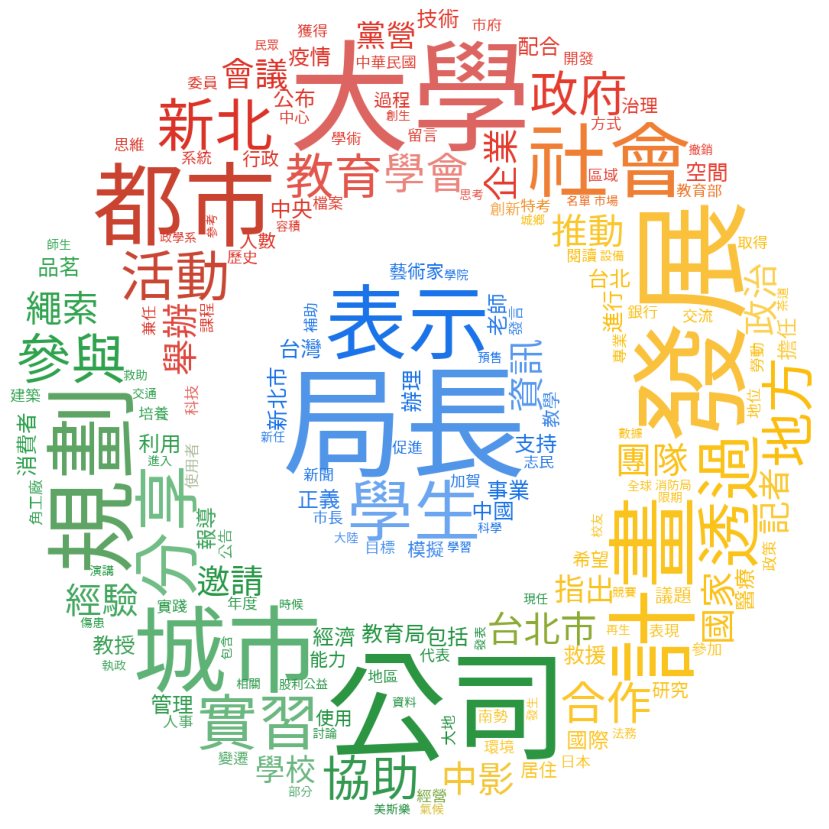

In [ ]:
keywords = textDict(d1)
renderWordCloud(keywords,mask_image)

### 利用DroidTown Articut 切割文本、抽取關鍵字

##### [卓騰科技NLP Training](https://github.com/Droidtown/NLP_Training)
##### [PyPi ArticutAPI](https://pypi.org/project/ArticutAPI/)
##### [ArticutAPI Github Documents](https://github.com/Droidtown/ArticutAPI)

In [ ]:
!pip install ArticutAPI

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from ArticutAPI import Articut
from pprint import pprint


if __name__ == "__main__":
    username = "easonchu7@gmail.com" 
    apikey   = "&c%GvnLqAGQavCkI@K9X+@O*z6W9lGJ" 

    articut = Articut(username, apikey)

進行文本切詞

In [ ]:
d2 = ''.join(d)
resultDICT = articut.parse(d2.replace(" ", "").replace("\n",""))
pprint(resultDICT)

串流輸出內容已截斷至最後 5000 行。
                 {'pos': 'ACTION_verb', 'text': '明訂'},
                 {'pos': 'ACTION_verb', 'text': '施行'},
                 {'pos': 'ENTITY_noun', 'text': '日期'},
                 {'pos': 'MODIFIER', 'text': '另'},
                 {'pos': 'RANGE_locality', 'text': '外'},
                 {'pos': 'ENTITY_pronoun', 'text': '他'},
                 {'pos': 'MODIFIER', 'text': '也'},
                 {'pos': 'ACTION_verb', 'text': '呼籲'},
                 {'pos': 'ACTION_verb', 'text': '修法'},
                 {'pos': 'FUNC_inner', 'text': '時'},
                 {'pos': 'FUNC_negation', 'text': '不要'},
                 {'pos': 'ACTION_lightVerb', 'text': '把'},
                 {'pos': 'ACTION_verb', 'text': '限制'},
                 {'pos': 'ENTITY_nouny', 'text': '預售屋'},
                 {'pos': 'ACTION_verb', 'text': '轉售'},
                 {'pos': 'FUNC_inner', 'text': '的'},
                 {'pos': 'ENTITY_nounHead', 'text': '條款'},
                 {'pos': 'ACTION_verb', 

In [ ]:
obj_Dict = resultDICT["result_obj"]

基於TextRank的關鍵字抽取

In [ ]:
import ArticutAPI
keyword2 =articut.analyse.textrank(resultDICT , topK=50)
print(keyword2)

['<ACTION_verb>有', '<MODIFIER>也', '<ENTITY_noun>大學', '<ACTION_verb>等', '<ACTION_verb>表示', '<ENTITY_noun>城市', '<ENTITY_noun>公司', '<ENTITY_noun>學生', '<ENTITY_num>一', '<ACTION_verb>計畫', '<LOCATION>台北', '<ENTITY_noun>社會', '<ACTION_verb>發展', '<ENTITY_noun>國民黨', '<ACTION_verb>來', '<ACTION_verb>實習', '<ENTITY_person>蔣萬安', '<ACTION_verb>規劃', '<ACTION_verb>合作', '<ACTION_verb>公布', '<ENTITY_noun>都市', '<ACTION_verb>透過', '<ACTION_verb>教育', '<ACTION_verb>讓', '<ENTITY_noun>人', '<MODIFIER>大', '<ENTITY_oov>影', '<LOCATION>新北', '<ENTITY_noun>地方', '<ACTION_verb>報導', '<MODIFIER>更', '<ENTITY_nouny>黨產', '<ACTION_verb>參與', '<TIME_day>今', '<ENTITY_pronoun>他', '<ENTITY_noun>團隊', '<ENTITY_noun>企業', '<ACTION_verb>分享', '<ACTION_verb>說', '<ENTITY_nouny>政', '<ENTITY_nounHead>市長', '<ACTION_verb>當', '<TIME_year>年', '<ENTITY_nouny>經驗', '<ENTITY_noun>學校', '<ENTITY_noun>記者', '<ACTION_verb>協助', '<LOCATION>臺北市', '<ENTITY_nounHead>委員會', '<ACTION_verb>要']


基於TF-IDF的關鍵字抽取

In [ ]:
keyword3 = articut.analyse.extract_tags(resultDICT, topK=50, withWeight=False, allowPOS=())
print(keyword3)

['大學', '規劃', '公司', '\xa0', '城市', '國民黨', '蔣萬安', '實習', '台北', '都市', '合作', '經驗', '新北', '影', '黨產', '政', '分享', '團隊', '企業', '報導', '計畫', '公布', '社會', '更', '永續', '發展', '市長', '新北市', '銀行', '記者', '黨營事業', '與', '及', '最後', '正義', '14日', '模擬', '繩索', '歲', '前', '表示', '時', '由', '協助', '邀請', '技術', '共', '支持', '辦理', '前往']


####結論
DroidTown Articut 在大多數的切割字詞表現優於Jieba，如「黨產」，但少數字詞卻無法如Jieba精準切割，如：「直到」在Jieba中精確劃分為一詞，但Articut 仍分為「直」、「到」。而在關鍵字提取部分，Articut內建的兩種算法擷取出來的關鍵字有些取差異，Articut的擷取關鍵字較前半部分繪製詞雲更為準確。